In [172]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import time  

train_data=pd.read_excel("C:/Users/risha/Downloads/q1train.xlsx")
test_data=pd.read_excel("C:/Users/risha/Downloads/q1test.xlsx")

train_data.head() 

,Aptitude,Verbal,Label
0,34.723660,30.386711,0
1,30.386711,35.947409,0
2,35.947409,60.282599,0
3,45.183277,61.206665,0
4,95.961555,75.113658,0


In [173]:
#Numpy conversion
d=train_data.to_numpy()
X=d[:,0:2]
Y=d[:,-1]

In [174]:
#Normalizing Dataset
from sklearn import preprocessing
import numpy as np
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [175]:
a=np.ones(X.shape[0])
a=np.expand_dims(a, axis=1)
X=np.append(a, X, axis=1)

In [176]:
#Sigmoid Function
def sigmoid(x):
    z = 1/(1 + np.exp(-x))
    return z

In [177]:
#Batch LMS GRADIENT DESCENT
alpha = 0.01 
tol=1e-5
m = Y.size 
weights = np.array([np.random.random(1)[0],np.random.random(1)[0],np.random.random(1)[0]])
cost=0
prev_cost=99999
cost_hist=[]
epochs=10000
for i in range(epochs):
    pred = sigmoid(X.dot(weights))
    prev_cost =-(Y.dot(np.log(pred))+(1-Y).dot(np.log(1-np.log(pred))))
    weights = weights - alpha*(X.T.dot(pred-Y))/m
    pred = sigmoid(X.dot(weights))
    cost = -(Y.dot(np.log(pred))+(1-Y).dot(np.log(1-np.log(pred))))
    cost_hist.append(cost)
print(weights)

[0.05476069 1.65040695 0.31334112]


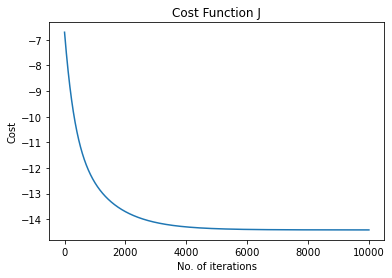

In [178]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_hist)
plt.show()

In [182]:
ypred=sigmoid(X.dot(weights))
# print(ypred)
ypred = np.where(ypred > 0.5, 1, 0)       

In [183]:
ypred

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0])

In [184]:
#Training Accuracy
ct = 0    
correctly_classified=0
for ct in range(np.size(ypred)):  
    if (Y[ct] == ypred[ct]) :            
        correctly_classified = correctly_classified + 1       
          
print( "Accuracy on training set:", ( correctly_classified / ct ) * 100,"%")

Accuracy on training set: 82.6086956521739 %


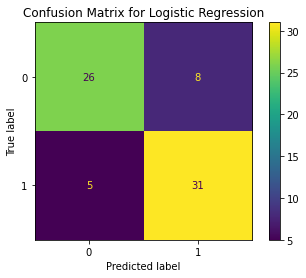

In [165]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y.T, ypred.T)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [113]:
#Prediction on test data
test_data= pd.read_excel("CLL788_A1/q2test.xlsx")
# print(test_data.head()) 
d=test_data.to_numpy()
X_test=d[:,0:2]
X_test=scaler.transform(X_test)
b=np.ones(X_test.shape[0])
b=np.expand_dims(b, axis=1)
X_test=np.append(b, X_test, axis=1)
# print(X_test)

In [114]:
ypred_test=sigmoid(X_test.dot(weights))
ypred_test = np.where(ypred_test > 0.5, 1, 0 ) 

In [115]:
ypred_test

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1])

In [116]:
np.savetxt('logistic_test.txt', ypred_test, fmt ='%.0f\n')

In [130]:
def predict(weights, X):
    
    m=X.shape[1]
    predictions=np.empty((1,m))
#     print(X.shape, weights.shape)
    A=weights.dot(X)
    predictions = (A > 0.5)
#     predictions=(int)predictions
    return predictions

In [166]:
def plot_data(inputs,targets,weights):
    # fig config
    plt.figure(figsize=(10,6))
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.grid(True)
    plt.title("Decision Boundary for Logistic Regression")

    for input,target in zip(X[:,1:3],Y):
        plt.plot(input[0],input[1],'ro' if (target == 1.0) else 'bo')

    # Here i am calculating slope and intercept with given three weights
    for i in np.linspace(np.amin(inputs[:,1:3]),np.amax(inputs[:,1:3])):
        slope = -(weights[0]/weights[2])/(weights[0]/weights[1])  
        intercept = -weights[0]/weights[2]

        #y =mx+c, m is slope and c is intercept
        y = (slope*i) + intercept
#         print(i)
        plt.plot(i, y,'ko')

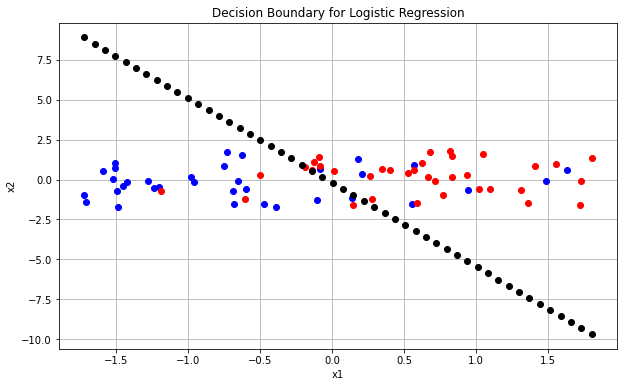

In [167]:
plot_data(X,Y,weights)